# 目录
## 1. 导入模块
## 2. 获取加利福尼亚数据
## 3. 自定义损失
  - `tf.reduce_mean`
  - `tf.square`
  
## 4. 定义模型、训练、测试

## 1. 导入模块

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

from tensorflow import keras
import tensorflow as tf
import sys
import os
import time
import datetime

for module in [np, pd, mpl, sklearn, keras, tf]:
    print(module.__name__, module.__version__)

numpy 1.18.1
pandas 0.25.3
matplotlib 3.1.2
sklearn 0.22.1
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf
tensorflow 2.1.0


## 2. 获取加利福尼亚数据

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=12234)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=1234)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

print(x_train_scaled.shape, y_train.shape)
print(x_valid_scaled.shape, y_valid.shape)
print(x_test_scaled.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


## 3. 自定义损失

In [8]:
def customized_mse(y_true, y_pred):
    '''
    y_true : shape= [batch_size, 1], Tensor类型
    y_pred: shape = [batch_size, 1]，Tensor类型
    '''
    return tf.reduce_mean(tf.square(y_true - y_pred))


## 4. 定义模型、训练、测试

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(100, input_shape=[8], activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss=customized_mse, optimizer=keras.optimizers.SGD(1e-3), metrics=["mse"])

history = model.fit(x_train_scaled, y_train, validation_data=(x_valid_scaled, y_valid), epochs=100)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 85us/sample - loss: 1.8155 - mse: 1.8155 - val_loss: 0.8343 - val_mse: 0.8343
Epoch 2/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.6817 - mse: 0.6817 - val_loss: 0.6578 - val_mse: 0.6578
Epoch 3/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.6282 - mse: 0.6282 - val_loss: 0.6120 - val_mse: 0.6120
Epoch 4/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.5946 - mse: 0.5946 - val_loss: 0.5783 - val_mse: 0.5783
Epoch 5/100
11610/11610 [==============================] - 1s 66us/sample - loss: 0.5646 - mse: 0.5646 - val_loss: 0.5469 - val_mse: 0.5469
Epoch 6/100
11610/11610 [==============================] - 1s 66us/sample - loss: 0.5392 - mse: 0.5392 - val_loss: 0.5201 - val_mse: 0.5201
Epoch 7/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.5166 - mse: 0.5166 - val_lo

Epoch 59/100
11610/11610 [==============================] - 1s 68us/sample - loss: 0.3442 - mse: 0.3442 - val_loss: 0.3544 - val_mse: 0.3544
Epoch 60/100
11610/11610 [==============================] - 1s 66us/sample - loss: 0.3436 - mse: 0.3436 - val_loss: 0.3469 - val_mse: 0.3469
Epoch 61/100
11610/11610 [==============================] - 1s 66us/sample - loss: 0.3431 - mse: 0.3431 - val_loss: 0.3489 - val_mse: 0.3489
Epoch 62/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.3424 - mse: 0.3424 - val_loss: 0.3529 - val_mse: 0.3529
Epoch 63/100
11610/11610 [==============================] - 1s 68us/sample - loss: 0.3417 - mse: 0.3417 - val_loss: 0.3529 - val_mse: 0.3529
Epoch 64/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.3411 - mse: 0.3411 - val_loss: 0.3429 - val_mse: 0.3429
Epoch 65/100
11610/11610 [==============================] - 1s 66us/sample - loss: 0.3402 - mse: 0.3402 - val_loss: 0.3547 - val_mse: 0.3547
Epoch 66/100


In [10]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

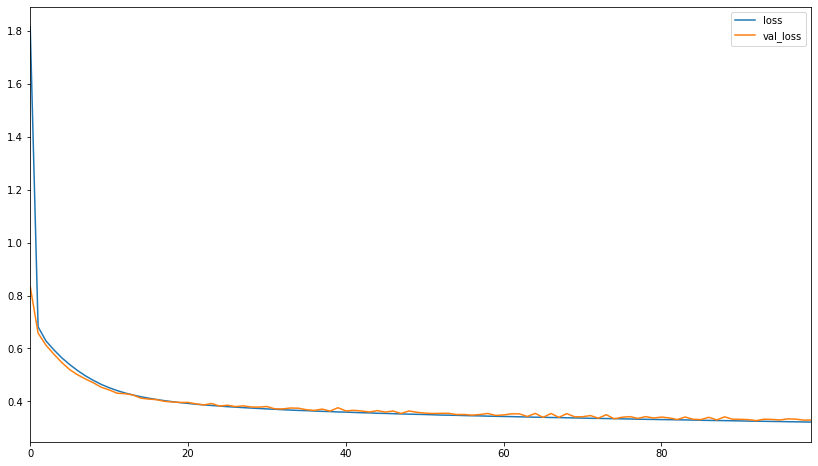

In [11]:
pd.DataFrame(history.history)[["loss", "val_loss"]].plot(figsize=(14, 8))

In [12]:
model.evaluate(x_test_scaled, y_test, batch_size=32)

5160/5160 [==============================] - 0s 36us/sample - loss: 0.3393 - mse: 0.3393


[0.33932812620503033, 0.33932808]